In [1]:
import mysql.connector as connection
from sqlalchemy import create_engine
import pandas as pd

In [2]:
# Create a SQLAlchemy engine using your MySQL connector connection
engine = create_engine("mysql+mysqlconnector://root@localhost/sample_superstore")

In [3]:
query = "show tables;"
pd.read_sql(query,engine)

,Tables_in_sample_superstore
0,customer
1,order
2,order_item
3,product
4,region
5,returns


In [4]:
customer = pd.read_sql("select * from `customer`", engine)
customer[["Customer ID"]] = customer[["Customer ID"]].astype("string")
customer.set_index("Customer ID", inplace=True)
customer.head()

,Customer Name,Segment,Country/Region,City,State,Postal Code
Customer ID,,,,,,
AA-10315,Alex Avila,Consumer,United States,Minneapolis,Minnesota,55407
AA-10375,Allen Armold,Consumer,United States,Mesa,Arizona,85204
AA-10480,Andrew Allen,Consumer,United States,Concord,North Carolina,28027
AA-10645,Anna Andreadi,Consumer,United States,Chester,Pennsylvania,19013
AB-10015,Aaron Bergman,Consumer,United States,Seattle,Washington,98103


In [5]:
order = pd.read_sql("select * from `order`", engine)

order[["Order ID", "Customer ID"]] = order[["Order ID", "Customer ID"]].astype("string")
order.set_index("Order ID", inplace=True)

order.head()

,Order Date,Ship Date,Ship Mode,Region,Customer ID
Order ID,,,,,
CA-2018-100006,2018-09-07,2018-09-13,Standard Class,1,DK-13375
CA-2018-100090,2018-07-08,2018-07-12,Standard Class,0,EB-13705
CA-2018-100293,2018-03-14,2018-03-18,Standard Class,3,NF-18475
CA-2018-100328,2018-01-28,2018-02-03,Standard Class,1,JC-15340
CA-2018-100363,2018-04-08,2018-04-15,Standard Class,0,JM-15655


In [6]:
order_item = pd.read_sql("select * from `order_item`", engine)

order_item[["Order Item ID", "Order ID", "Product ID"]] = order_item[["Order Item ID", "Order ID", "Product ID"]].astype("string")
order_item.set_index("Order Item ID", inplace=True)

order_item.head()

,Order ID,Product ID,Sales,Quantity,Discount,Profit,Profit Margin,Cost of Goods Sold,Cost of Sales,Other Expenses
Order Item ID,,,,,,,,,,
CA-2018-100006_2718,CA-2018-100006,TEC-PH-10002075,377.970,3,0.0,109.6113,0.2900,178.9058,44.72645,44.72645
CA-2018-100090_6288,CA-2018-100090,FUR-TA-10003715,502.488,3,0.2,-87.9354,-0.1750,460.6140,115.15350,115.15350
CA-2018-100090_6289,CA-2018-100090,OFF-BI-10001597,196.704,6,0.2,68.8464,0.3500,111.4656,27.86640,27.86640
CA-2018-100293_9515,CA-2018-100293,OFF-PA-10000176,91.056,6,0.2,31.8696,0.3500,51.5984,12.89960,12.89960
CA-2018-100328_3084,CA-2018-100328,OFF-BI-10000343,3.928,1,0.2,1.3257,0.3375,2.2586,0.56465,0.56465


In [7]:
product = pd.read_sql("select * from `product`", engine)

product[["Product ID"]] = product[["Product ID"]].astype("string")
product.set_index("Product ID", inplace=True)

product.head()

,Category,Sub-Category,Product Name
Product ID,,,
FUR-BO-10000112,Furniture,Bookcases,"""Bush Birmingham Collection Bookcase"
FUR-BO-10000330,Furniture,Bookcases,"""Sauder Camden County Barrister Bookcase"
FUR-BO-10000362,Furniture,Bookcases,Sauder Inglewood Library Bookcases
FUR-BO-10000468,Furniture,Bookcases,O'Sullivan 2-Shelf Heavy-Duty Bookcases
FUR-BO-10000711,Furniture,Bookcases,"""Hon Metal Bookcases"


In [8]:
region = pd.read_sql("select * from `region`", engine)

region.set_index("Region ID", inplace=True)

region.head()

,Region,Regional Manager
Region ID,,
0,West,Sadie Pawthorne
1,East,Chuck Magee
2,Central,Roxanne Rodriguez
3,South,Fred Suzuki


In [9]:
returns = pd.read_sql("select * from `returns`", engine)


returns[["Returns ID"]] = returns[["Returns ID"]].astype("string")
returns.set_index("Returns ID", inplace=True)

returns.head()

,Order ID
Returns ID,
R_CA-2018-100762,CA-2018-100762
R_CA-2018-100867,CA-2018-100867
R_CA-2018-102652,CA-2018-102652
R_CA-2018-103373,CA-2018-103373
R_CA-2018-103744,CA-2018-103744


### Join Order item and product table

In [10]:
order_product_join = order_item.join(product, on="Product ID", rsuffix = "_product")

In [11]:
order_product_join.head()

,Order ID,Product ID,Sales,Quantity,Discount,Profit,Profit Margin,Cost of Goods Sold,Cost of Sales,Other Expenses,Category,Sub-Category,Product Name
Order Item ID,,,,,,,,,,,,,
CA-2018-100006_2718,CA-2018-100006,TEC-PH-10002075,377.970,3,0.0,109.6113,0.2900,178.9058,44.72645,44.72645,Technology,Phones,AT&T EL51110 DECT
CA-2018-100090_6288,CA-2018-100090,FUR-TA-10003715,502.488,3,0.2,-87.9354,-0.1750,460.6140,115.15350,115.15350,Furniture,Tables,Hon 2111 Invitation Series Corner Table
CA-2018-100090_6289,CA-2018-100090,OFF-BI-10001597,196.704,6,0.2,68.8464,0.3500,111.4656,27.86640,27.86640,Office Supplies,Binders,"""Wilson Jones Ledger-Size"
CA-2018-100293_9515,CA-2018-100293,OFF-PA-10000176,91.056,6,0.2,31.8696,0.3500,51.5984,12.89960,12.89960,Office Supplies,Paper,Xerox 1887
CA-2018-100328_3084,CA-2018-100328,OFF-BI-10000343,3.928,1,0.2,1.3257,0.3375,2.2586,0.56465,0.56465,Office Supplies,Binders,"""Pressboard Covers with Storage Hooks"


### Join above result with order table

In [12]:
order_item_order_join = order_product_join.join(order, on="Order ID", rsuffix = "_order_item")

In [13]:
order_item_order_join.head()

,Order ID,Product ID,Sales,Quantity,Discount,Profit,Profit Margin,Cost of Goods Sold,Cost of Sales,Other Expenses,Category,Sub-Category,Product Name,Order Date,Ship Date,Ship Mode,Region,Customer ID
Order Item ID,,,,,,,,,,,,,,,,,,
CA-2018-100006_2718,CA-2018-100006,TEC-PH-10002075,377.970,3,0.0,109.6113,0.2900,178.9058,44.72645,44.72645,Technology,Phones,AT&T EL51110 DECT,2018-09-07,2018-09-13,Standard Class,1,DK-13375
CA-2018-100090_6288,CA-2018-100090,FUR-TA-10003715,502.488,3,0.2,-87.9354,-0.1750,460.6140,115.15350,115.15350,Furniture,Tables,Hon 2111 Invitation Series Corner Table,2018-07-08,2018-07-12,Standard Class,0,EB-13705
CA-2018-100090_6289,CA-2018-100090,OFF-BI-10001597,196.704,6,0.2,68.8464,0.3500,111.4656,27.86640,27.86640,Office Supplies,Binders,"""Wilson Jones Ledger-Size",2018-07-08,2018-07-12,Standard Class,0,EB-13705
CA-2018-100293_9515,CA-2018-100293,OFF-PA-10000176,91.056,6,0.2,31.8696,0.3500,51.5984,12.89960,12.89960,Office Supplies,Paper,Xerox 1887,2018-03-14,2018-03-18,Standard Class,3,NF-18475
CA-2018-100328_3084,CA-2018-100328,OFF-BI-10000343,3.928,1,0.2,1.3257,0.3375,2.2586,0.56465,0.56465,Office Supplies,Binders,"""Pressboard Covers with Storage Hooks",2018-01-28,2018-02-03,Standard Class,1,JC-15340


### Join above result with region table

In [14]:
order_item_region_join = order_item_order_join.join(region, on="Region", rsuffix = "_region")

In [15]:
order_item_region_join.head()

,Order ID,Product ID,Sales,Quantity,Discount,Profit,Profit Margin,Cost of Goods Sold,Cost of Sales,Other Expenses,Category,Sub-Category,Product Name,Order Date,Ship Date,Ship Mode,Region,Customer ID,Region_region,Regional Manager
Order Item ID,,,,,,,,,,,,,,,,,,,,
CA-2018-100006_2718,CA-2018-100006,TEC-PH-10002075,377.970,3,0.0,109.6113,0.2900,178.9058,44.72645,44.72645,Technology,Phones,AT&T EL51110 DECT,2018-09-07,2018-09-13,Standard Class,1,DK-13375,East,Chuck Magee
CA-2018-100090_6288,CA-2018-100090,FUR-TA-10003715,502.488,3,0.2,-87.9354,-0.1750,460.6140,115.15350,115.15350,Furniture,Tables,Hon 2111 Invitation Series Corner Table,2018-07-08,2018-07-12,Standard Class,0,EB-13705,West,Sadie Pawthorne
CA-2018-100090_6289,CA-2018-100090,OFF-BI-10001597,196.704,6,0.2,68.8464,0.3500,111.4656,27.86640,27.86640,Office Supplies,Binders,"""Wilson Jones Ledger-Size",2018-07-08,2018-07-12,Standard Class,0,EB-13705,West,Sadie Pawthorne
CA-2018-100293_9515,CA-2018-100293,OFF-PA-10000176,91.056,6,0.2,31.8696,0.3500,51.5984,12.89960,12.89960,Office Supplies,Paper,Xerox 1887,2018-03-14,2018-03-18,Standard Class,3,NF-18475,South,Fred Suzuki
CA-2018-100328_3084,CA-2018-100328,OFF-BI-10000343,3.928,1,0.2,1.3257,0.3375,2.2586,0.56465,0.56465,Office Supplies,Binders,"""Pressboard Covers with Storage Hooks",2018-01-28,2018-02-03,Standard Class,1,JC-15340,East,Chuck Magee


### Join return column

In [16]:
order_item_return_join = order_item_region_join.copy()

In [17]:
order_item_return_join["Returned Quantities"] = 0

In [18]:
order_with_returns = set(returns["Order ID"].to_list())

In [19]:
for i, row in order_item_return_join.iterrows():
    if row["Order ID"] in order_with_returns:
        order_item_return_join.loc[i, "Returned Quantities"] = row["Quantity"]

In [20]:
order_item_return_join.head()

,Order ID,Product ID,Sales,Quantity,Discount,Profit,Profit Margin,Cost of Goods Sold,Cost of Sales,Other Expenses,...,Sub-Category,Product Name,Order Date,Ship Date,Ship Mode,Region,Customer ID,Region_region,Regional Manager,Returned Quantities
Order Item ID,,,,,,,,,,,,,,,,,,,,,
CA-2018-100006_2718,CA-2018-100006,TEC-PH-10002075,377.970,3,0.0,109.6113,0.2900,178.9058,44.72645,44.72645,...,Phones,AT&T EL51110 DECT,2018-09-07,2018-09-13,Standard Class,1,DK-13375,East,Chuck Magee,0
CA-2018-100090_6288,CA-2018-100090,FUR-TA-10003715,502.488,3,0.2,-87.9354,-0.1750,460.6140,115.15350,115.15350,...,Tables,Hon 2111 Invitation Series Corner Table,2018-07-08,2018-07-12,Standard Class,0,EB-13705,West,Sadie Pawthorne,0
CA-2018-100090_6289,CA-2018-100090,OFF-BI-10001597,196.704,6,0.2,68.8464,0.3500,111.4656,27.86640,27.86640,...,Binders,"""Wilson Jones Ledger-Size",2018-07-08,2018-07-12,Standard Class,0,EB-13705,West,Sadie Pawthorne,0
CA-2018-100293_9515,CA-2018-100293,OFF-PA-10000176,91.056,6,0.2,31.8696,0.3500,51.5984,12.89960,12.89960,...,Paper,Xerox 1887,2018-03-14,2018-03-18,Standard Class,3,NF-18475,South,Fred Suzuki,0
CA-2018-100328_3084,CA-2018-100328,OFF-BI-10000343,3.928,1,0.2,1.3257,0.3375,2.2586,0.56465,0.56465,...,Binders,"""Pressboard Covers with Storage Hooks",2018-01-28,2018-02-03,Standard Class,1,JC-15340,East,Chuck Magee,0


In [21]:
order_item_return_join["Order Date"] = pd.to_datetime(order_item_return_join["Order Date"])
order_item_return_join["Ship Date"] = pd.to_datetime(order_item_return_join["Ship Date"])

In [22]:
source_data = order_item_return_join.copy()

## Operational Report

We are considering Dec-2021 data for operational report which will be sent out monthly

In [23]:
order_item_return_join = order_item_return_join[order_item_return_join["Order Date"].dt.year == 2021]
order_item_return_join = order_item_return_join[order_item_return_join["Order Date"].dt.month == 12]

### Simple metrics

In [25]:
columns_needed = ["Region_region", "Regional Manager", "Category", "Sales", "Quantity", "Profit"]
simple_metrics = order_item_return_join[columns_needed].groupby(["Region_region", "Regional Manager", "Category"]).sum()
simple_metrics

Sales  Quantity  \
Region_region Regional Manager  Category                                
Central       Roxanne Rodriguez Furniture         6504.8868        63   
                                Office Supplies   7870.8020       252   
                                Technology        4507.3820        54   
East          Chuck Magee       Furniture         6954.8660        99   
                                Office Supplies   8232.3100       310   
                                Technology        4897.2400        75   
South         Fred Suzuki       Furniture         5585.2830        61   
                                Office Supplies   5108.6900       129   
                                Technology        4515.7640        49   
West          Sadie Pawthorne   Furniture        12362.4310       171   
                                Office Supplies   9225.1400       370   
                                Technology        8064.5240        90   

                                                    Profit  
Region_region Regional Manager  Category                    
Central       Roxanne Rodriguez Furniture         318.0389  
                                Office Supplies -2821.5387  
                                Technology       1265.1244  
East          Chuck Magee       Furniture         547.5688  
                                Office Supplies  1603.6967  
                                Technology       1073.8339  
South         Fred Suzuki       Furniture         279.2939  
                                Office Supplies   850.5313  
                                Technology       1197.4727  
West          Sadie Pawthorne   Furniture           1.8532  
                                Office Supplies  2141.6239  
                                Technology       2025.8478

### Financial metrics

In [26]:
fm_df = order_item_return_join.copy()

In [27]:
fm_df["Discount value"] = fm_df["Discount"]*fm_df["Sales"]
fm_df["Gross Margin Ratio"] = ((fm_df["Sales"] - fm_df["Cost of Goods Sold"]) / fm_df["Sales"]) * 100
fm_df["Net Margin Ratio"] = ((fm_df["Sales"] - fm_df["Cost of Goods Sold"] - fm_df["Other Expenses"] - fm_df["Discount value"]) / fm_df["Sales"]) * 100

In [28]:
columns_needed = ["Region_region", "Regional Manager", "Category", "Gross Margin Ratio", "Net Margin Ratio"]
fm_metrics_df = fm_df[columns_needed].groupby(["Region_region", "Regional Manager", "Category"]).mean()
fm_metrics_df

Gross Margin Ratio  \
Region_region Regional Manager  Category                              
Central       Roxanne Rodriguez Furniture                 -3.480459   
                                Office Supplies           13.545455   
                                Technology                46.077778   
East          Chuck Magee       Furniture                 33.260221   
                                Office Supplies           35.841069   
                                Technology                35.568783   
South         Fred Suzuki       Furniture                 36.506313   
                                Office Supplies           38.552469   
                                Technology                40.697917   
West          Sadie Pawthorne   Furniture                 25.474129   
                                Office Supplies           45.222778   
                                Technology                32.362319   

                                                 Net Margin Ratio  
Region_region Regional Manager  Category                           
Central       Roxanne Rodriguez Furniture              -62.302955  
                                Office Supplies        -28.977273  
                                Technology              25.930556  
East          Chuck Magee       Furniture                3.848004  
                                Office Supplies          3.978551  
                                Technology               6.127646  
South         Fred Suzuki       Furniture               10.320391  
                                Office Supplies         12.079475  
                                Technology              15.872396  
West          Sadie Pawthorne   Furniture               -8.574006  
                                Office Supplies         21.228472  
                                Technology               0.670290

### Sales metrics

In [29]:
sales_df = order_item_return_join.copy()

In [30]:
columns_needed = ["Region_region", "Regional Manager", "Category", "Sales", "Cost of Sales"]
sales_metrics_df =sales_df[columns_needed].groupby(["Region_region", "Regional Manager", "Category"]).sum()

In [31]:
for i, row in sales_metrics_df.iterrows():
    sales_metrics_df.loc[i, "Sales Effectiveness"] = row["Sales"] / row["Cost of Sales"]

In [867]:
columns = ["Region_region", "Regional Manager", "Category", "Order Date", "Sales"]
sum_sales_by_date = sales_df[columns].groupby(["Region_region", "Regional Manager", "Category", pd.Grouper(key="Order Date", freq="D" )]).sum()

In [32]:
sales_metrics_df.drop(["Sales", "Cost of Sales"], axis=1, inplace=True)

In [33]:
sales_metrics_df

Sales Effectiveness
Region_region Regional Manager  Category                            
Central       Roxanne Rodriguez Furniture                   5.530510
                                Office Supplies             3.682411
                                Technology                  8.016772
East          Chuck Magee       Furniture                   5.624753
                                Office Supplies             6.741724
                                Technology                  6.721109
South         Fred Suzuki       Furniture                   5.547988
                                Office Supplies             6.922423
                                Technology                  7.251374
West          Sadie Pawthorne   Furniture                   5.216935
                                Office Supplies             7.342524
                                Technology                  6.522225

### Returns metrics

In [34]:
returns_df = order_item_return_join.copy()[["Region_region", "Regional Manager", "Category", "Sales", "Profit Margin", "Quantity", "Returned Quantities"]]

In [35]:
quantities_return_df = returns_df.groupby(["Region_region", "Regional Manager", "Category"]).sum()

In [36]:
quantities_return_df["Return Rate"] = (quantities_return_df["Returned Quantities"] / quantities_return_df["Quantity"])*100

In [37]:
quantities_return_df.drop(["Sales", "Profit Margin", "Quantity", "Returned Quantities"], axis=1, inplace=True)

In [38]:
data_with_returns = returns_df[returns_df["Returned Quantities"] > 0].groupby(["Region_region", "Regional Manager", "Category"]).sum()

In [39]:
data_with_returns["Profit Margin on Returns"] = data_with_returns["Profit Margin"]

In [40]:
data_with_returns.drop(["Sales", "Profit Margin", "Quantity", "Returned Quantities"], axis=1, inplace=True)

In [41]:
return_metrics_df = pd.concat([quantities_return_df, data_with_returns], axis=1)

In [42]:
return_metrics_df

Return Rate  \
Region_region Regional Manager  Category                       
Central       Roxanne Rodriguez Furniture           3.174603   
                                Office Supplies    13.095238   
                                Technology          0.000000   
East          Chuck Magee       Furniture           0.000000   
                                Office Supplies     2.903226   
                                Technology          6.666667   
South         Fred Suzuki       Furniture           9.836066   
                                Office Supplies    13.178295   
                                Technology          4.081633   
West          Sadie Pawthorne   Furniture          16.959064   
                                Office Supplies    19.729730   
                                Technology          8.888889   

                                                 Profit Margin on Returns  
Region_region Regional Manager  Category                                   
Central       Roxanne Rodriguez Furniture                       -0.147059  
                                Office Supplies                 -3.887500  
                                Technology                            NaN  
East          Chuck Magee       Furniture                             NaN  
                                Office Supplies                  0.320000  
                                Technology                       0.290000  
South         Fred Suzuki       Furniture                       -0.266667  
                                Office Supplies                  0.495000  
                                Technology                       0.162500  
West          Sadie Pawthorne   Furniture                        1.829118  
                                Office Supplies                  5.650000  
                                Technology                       0.380000

### Shipping metrics

In [43]:
shipping_df = order_item_return_join.copy()[["Region_region", "Regional Manager", "Category", "Order Date", "Ship Date"]]

In [44]:
shipping_df["Shipping Time"] = shipping_df["Ship Date"] - shipping_df["Order Date"]

In [45]:
shipping_metrics_df = shipping_df.groupby(["Region_region", "Regional Manager", "Category"]).mean()

In [46]:
shipping_metrics_df.drop(["Order Date", "Ship Date"], axis=1, inplace=True)

In [47]:
shipping_metrics_df

Shipping Time
Region_region Regional Manager  Category                                 
Central       Roxanne Rodriguez Furniture       3 days 02:17:08.571428571
                                Office Supplies 4 days 06:10:54.545454545
                                Technology                3 days 19:12:00
East          Chuck Magee       Furniture       4 days 10:54:32.727272727
                                Office Supplies 4 days 08:48:36.455696202
                                Technology      4 days 02:17:08.571428571
South         Fred Suzuki       Furniture                 3 days 22:30:00
                                Office Supplies           4 days 09:20:00
                                Technology                4 days 10:30:00
West          Sadie Pawthorne   Furniture                 4 days 06:00:00
                                Office Supplies           3 days 14:52:48
                                Technology      3 days 10:26:05.217391304

### Prepare Operational Report

In [48]:
operational_report = pd.concat([simple_metrics, fm_metrics_df, sales_metrics_df, return_metrics_df, shipping_metrics_df], axis=1)

In [49]:
operational_report.columns

Index(['Sales', 'Quantity', 'Profit', 'Gross Margin Ratio', 'Net Margin Ratio',
       'Sales Effectiveness', 'Return Rate', 'Profit Margin on Returns',
       'Shipping Time'],
      dtype='object')

In [50]:
operational_report.columns = ["Total Sales", "Total Quantity", "Total Profit", "Gross Margin Ratio", "Net Margin Ratio",
                              "Sales Effectiveness", 'Return Rate',
                              'Profit Margin on Returns', 'Avg.Order Processing Time (Days)']

In [51]:
total_index = pd.MultiIndex.from_tuples([('-', '-', 'Grand Total')],
                          names = ['Region_region', 'Regional Manager', 'Category'])

In [52]:
total = {}
for column in operational_report.columns:
    total[column] = operational_report[column].sum()



In [53]:
operational_report = pd.concat([operational_report, pd.DataFrame(total, total_index)] )

#### Report template submitted in lab 1

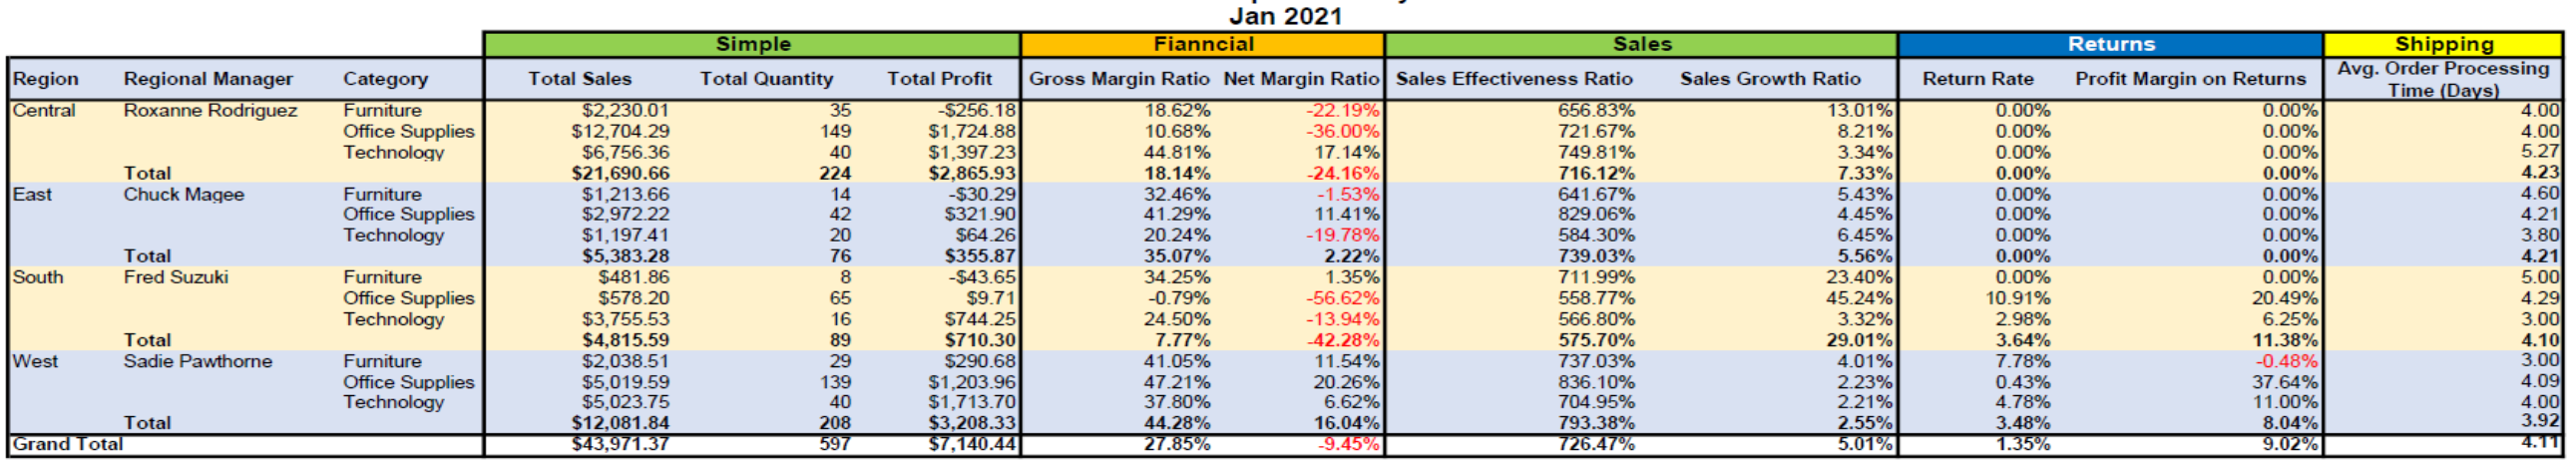

#### Report Generated:

In [54]:
operational_report

Total Sales  Total Quantity  \
Region_region Regional Manager  Category                                       
Central       Roxanne Rodriguez Furniture          6504.8868              63   
                                Office Supplies    7870.8020             252   
                                Technology         4507.3820              54   
East          Chuck Magee       Furniture          6954.8660              99   
                                Office Supplies    8232.3100             310   
                                Technology         4897.2400              75   
South         Fred Suzuki       Furniture          5585.2830              61   
                                Office Supplies    5108.6900             129   
                                Technology         4515.7640              49   
West          Sadie Pawthorne   Furniture         12362.4310             171   
                                Office Supplies    9225.1400             370   
                                Technology         8064.5240              90   
-             -                 Grand Total       83829.3188            1723   

                                                 Total Profit  \
Region_region Regional Manager  Category                        
Central       Roxanne Rodriguez Furniture            318.0389   
                                Office Supplies    -2821.5387   
                                Technology          1265.1244   
East          Chuck Magee       Furniture            547.5688   
                                Office Supplies     1603.6967   
                                Technology          1073.8339   
South         Fred Suzuki       Furniture            279.2939   
                                Office Supplies      850.5313   
                                Technology          1197.4727   
West          Sadie Pawthorne   Furniture              1.8532   
                                Office Supplies     2141.6239   
                                Technology          2025.8478   
-             -                 Grand Total         8483.3468   

                                                 Gross Margin Ratio  \
Region_region Regional Manager  Category                              
Central       Roxanne Rodriguez Furniture                 -3.480459   
                                Office Supplies           13.545455   
                                Technology                46.077778   
East          Chuck Magee       Furniture                 33.260221   
                                Office Supplies           35.841069   
                                Technology                35.568783   
South         Fred Suzuki       Furniture                 36.506313   
                                Office Supplies           38.552469   
                                Technology                40.697917   
West          Sadie Pawthorne   Furniture                 25.474129   
                                Office Supplies           45.222778   
                                Technology                32.362319   
-             -                 Grand Total              379.628771   

                                                 Net Margin Ratio  \
Region_region Regional Manager  Category                            
Central       Roxanne Rodriguez Furniture              -62.302955   
                                Office Supplies        -28.977273   
                                Technology              25.930556   
East          Chuck Magee       Furniture                3.848004   
                                Office Supplies          3.978551   
                                Technology               6.127646   
South         Fred Suzuki       Furniture               10.320391   
                                Office Supplies         12.079475   
                                Technology              15.872396   
West          Sadie Pawthorne   Furniture      

In [841]:
operational_report.to_excel("Operational Report V3.xlsx", sheet_name='Operational Report')

## Executive Report ( 2020 - 2021 )

In [55]:
executive_report_data = source_data[source_data["Order Date"].dt.year >= 2020]
executive_report_data.reset_index(inplace=True)

In [56]:
# We are following end convention, so data will be saved at end of the quarter

year_start = 2020
year_end = 2021

quarters = (f"{year_start}-06-30", f"{year_start}-09-30", f"{year_start}-12-31", f"{year_end}-03-31")
print(quarters)

('2020-06-30', '2020-09-30', '2020-12-31', '2021-03-31')


### Financial Metrics

In [57]:
fm_df_ex = executive_report_data.copy()

In [58]:
fm_df_ex["Discount value"] = fm_df_ex["Discount"]*fm_df_ex["Sales"]
fm_df_ex["Gross Margin Ratio"] = ((fm_df_ex["Sales"] - fm_df_ex["Cost of Goods Sold"]) / fm_df_ex["Sales"]) * 100
fm_df_ex["Net Margin Ratio"] = ((fm_df_ex["Sales"] - fm_df_ex["Cost of Goods Sold"] - fm_df_ex["Other Expenses"] - fm_df_ex["Discount value"]) / fm_df_ex["Sales"]) * 100


In [59]:
columns_needed = ["Gross Margin Ratio", "Net Margin Ratio", "Order Date"]
fm_metrics_df_ex = fm_df_ex[columns_needed].groupby([pd.Grouper(key="Order Date", freq="Q", convention = "end" )]).mean()
fm_metrics_df_ex = fm_metrics_df_ex.transpose()

In [60]:
fm_metrics_df_ex.index.names = ['Financial Metrics']
fm_metrics_df_ex.columns = fm_metrics_df_ex.columns.astype('string')

In [61]:
fm_metrics_df_ex

Order Date,2020-03-31,2020-06-30,2020-09-30,2020-12-31,2021-03-31,2021-06-30,2021-09-30,2021-12-31
Financial Metrics,,,,,,,,
Gross Margin Ratio,30.938013,30.373737,31.236383,33.124750,30.587293,26.924956,33.858796,30.364485
Net Margin Ratio,-1.527483,-3.127105,-2.030197,1.717484,-1.887884,-8.514820,2.860594,-2.920521


In [62]:
fm_metrics_df_ex["Q1vsQ2"] = fm_metrics_df_ex[quarters[1]] - fm_metrics_df_ex[quarters[0]]
fm_metrics_df_ex["Q2vsQ3"] = fm_metrics_df_ex[quarters[2]] - fm_metrics_df_ex[quarters[1]]
fm_metrics_df_ex["Q3vsQ4"] = fm_metrics_df_ex[quarters[3]] - fm_metrics_df_ex[quarters[2]]

In [63]:
fm_metrics_df_ex = fm_metrics_df_ex[["Q1vsQ2", "Q2vsQ3", "Q3vsQ4"]]
fm_metrics_df_ex.head()

Order Date,Q1vsQ2,Q2vsQ3,Q3vsQ4
Financial Metrics,,,
Gross Margin Ratio,0.862646,1.888367,-2.537457
Net Margin Ratio,1.096907,3.747681,-3.605368


### Sales Metrics

In [64]:
sales_df_ex = executive_report_data.copy()

In [65]:
sales_df_ex["Sales Effectiveness"] = sales_df_ex["Sales"] / sales_df_ex["Cost of Sales"]

In [66]:
columns_needed = ["Sales Effectiveness", "Sales", "Order Date"]
sales_metrics_df_ex = sales_df_ex[columns_needed].groupby([pd.Grouper(key="Order Date", freq="Q", convention = "end" )]).mean()

In [67]:
prev_index = None
for i, row in sales_metrics_df_ex.iterrows():
    
    if prev_index is None:
        prev_index = i
        sales_metrics_df_ex.loc[i, "Sales Growth Rate"] = 0
        continue
    
    prev_sales = sales_metrics_df_ex.loc[prev_index, "Sales"]
    curr_sales = sales_metrics_df_ex.loc[i, "Sales"]
    sales_metrics_df_ex.loc[i, "Sales Growth Rate"] = (curr_sales - prev_sales) / prev_sales

In [68]:
sales_metrics_df_ex = sales_metrics_df_ex.transpose()
sales_metrics_df_ex

Order Date,2020-03-31,2020-06-30,2020-09-30,2020-12-31,2021-03-31,2021-06-30,2021-09-30,2021-12-31
Sales Effectiveness,7.218131,7.225773,7.255288,7.274309,7.334941,7.001097,7.366529,7.175720
Sales,278.319943,229.094783,194.307246,257.188185,246.289720,193.861409,217.333285,229.740826
Sales Growth Rate,0.000000,-0.176865,-0.301857,-0.075926,-0.115084,-0.303458,-0.219124,-0.174544


In [69]:
sales_metrics_df_ex.index.names = ['Sales Metrics']
sales_metrics_df_ex.columns = sales_metrics_df_ex.columns.astype('string')

In [70]:
sales_metrics_df_ex["Q1vsQ2"] = sales_metrics_df_ex[quarters[1]] - sales_metrics_df_ex[quarters[0]]
sales_metrics_df_ex["Q2vsQ3"] = sales_metrics_df_ex[quarters[2]] - sales_metrics_df_ex[quarters[1]]
sales_metrics_df_ex["Q3vsQ4"] = sales_metrics_df_ex[quarters[3]] - sales_metrics_df_ex[quarters[2]]

In [71]:
sales_metrics_df_ex

Order Date,2020-03-31,2020-06-30,2020-09-30,2020-12-31,2021-03-31,2021-06-30,2021-09-30,2021-12-31,Q1vsQ2,Q2vsQ3,Q3vsQ4
Sales Metrics,,,,,,,,,,,
Sales Effectiveness,7.218131,7.225773,7.255288,7.274309,7.334941,7.001097,7.366529,7.175720,0.029516,0.019021,0.060631
Sales,278.319943,229.094783,194.307246,257.188185,246.289720,193.861409,217.333285,229.740826,-34.787537,62.880939,-10.898465
Sales Growth Rate,0.000000,-0.176865,-0.301857,-0.075926,-0.115084,-0.303458,-0.219124,-0.174544,-0.124991,0.225930,-0.039158


In [72]:
sales_metrics_df_ex.drop(["Sales"], inplace=True)
sales_metrics_df_ex = sales_metrics_df_ex[["Q1vsQ2", "Q2vsQ3", "Q3vsQ4"]]
sales_metrics_df_ex.head()

Order Date,Q1vsQ2,Q2vsQ3,Q3vsQ4
Sales Metrics,,,
Sales Effectiveness,0.029516,0.019021,0.060631
Sales Growth Rate,-0.124991,0.225930,-0.039158


### Returns Metrics

In [73]:
returns_df_ex = executive_report_data.copy()

In [74]:
returns_df_ex["Return Rate"] = (returns_df_ex["Returned Quantities"] / returns_df_ex["Quantity"])*100

In [75]:
for i, row in returns_df_ex.iterrows():
    if row["Returned Quantities"] > 0:
        
        returns_df_ex.loc[i, "Profit Margin On Returns"] = row["Profit Margin"]
    else:
        returns_df_ex.loc[i, "Profit Margin On Returns"] = 0

In [76]:
columns_needed = ["Return Rate", "Profit Margin On Returns", "Order Date"]
returns_metrics_df_ex = returns_df_ex[columns_needed].groupby([pd.Grouper(key="Order Date", freq="Q", convention = "end" )]).mean()
returns_metrics_df_ex = returns_metrics_df_ex.transpose()

In [77]:
returns_metrics_df_ex.index.names = ['Returns Metrics']
returns_metrics_df_ex.columns = returns_metrics_df_ex.columns.astype('string')

In [78]:
returns_metrics_df_ex

Order Date,2020-03-31,2020-06-30,2020-09-30,2020-12-31,2021-03-31,2021-06-30,2021-09-30,2021-12-31
Returns Metrics,,,,,,,,
Return Rate,7.462687,9.090909,6.216216,7.843137,9.600000,5.507246,11.295681,8.285480
Profit Margin On Returns,0.012445,0.001021,0.012868,0.011652,0.013528,0.007343,0.022377,0.014737


In [79]:
returns_metrics_df_ex["Q1vsQ2"] = returns_metrics_df_ex[quarters[1]] - returns_metrics_df_ex[quarters[0]]
returns_metrics_df_ex["Q2vsQ3"] = returns_metrics_df_ex[quarters[2]] - returns_metrics_df_ex[quarters[1]]
returns_metrics_df_ex["Q3vsQ4"] = returns_metrics_df_ex[quarters[3]] - returns_metrics_df_ex[quarters[2]]

In [80]:
returns_metrics_df_ex = returns_metrics_df_ex[["Q1vsQ2", "Q2vsQ3", "Q3vsQ4"]]
returns_metrics_df_ex.head()

Order Date,Q1vsQ2,Q2vsQ3,Q3vsQ4
Returns Metrics,,,
Return Rate,-2.874693,1.626921,1.756863
Profit Margin On Returns,0.011847,-0.001216,0.001876


### Shipping metrics

In [81]:
shipping_df_ex = executive_report_data.copy()

In [82]:
shipping_df_ex["Shipping Time"] = shipping_df_ex["Ship Date"] - shipping_df_ex["Order Date"]

In [83]:
columns_needed = ["Shipping Time", "Order Date"]
shipping_metrics_df_ex = shipping_df_ex[columns_needed].groupby([pd.Grouper(key="Order Date", freq="Q", convention = "end" )]).mean()
shipping_metrics_df_ex = shipping_metrics_df_ex.transpose()

In [84]:
shipping_metrics_df_ex.index.names = ['Shipping Metrics']
shipping_metrics_df_ex.columns = shipping_metrics_df_ex.columns.astype('string')

In [85]:
shipping_metrics_df_ex

Order Date,2020-03-31,2020-06-30,2020-09-30,2020-12-31,2021-03-31,2021-06-30,2021-09-30,2021-12-31
Shipping Metrics,,,,,,,,
Shipping Time,3 days 16:07:09.850746268,3 days 21:22:25.454545454,4 days 00:44:45.405405405,4 days 00:39:12.941176470,3 days 21:47:31.200000,3 days 20:58:26.086956521,3 days 21:18:56.212624584,3 days 22:26:40.656275635


In [86]:
shipping_metrics_df_ex["Q1vsQ2"] = shipping_metrics_df_ex[quarters[1]] - shipping_metrics_df_ex[quarters[0]]
shipping_metrics_df_ex["Q2vsQ3"] = shipping_metrics_df_ex[quarters[2]] - shipping_metrics_df_ex[quarters[1]]
shipping_metrics_df_ex["Q3vsQ4"] = shipping_metrics_df_ex[quarters[3]] - shipping_metrics_df_ex[quarters[2]]

In [87]:
shipping_metrics_df_ex = shipping_metrics_df_ex[["Q1vsQ2", "Q2vsQ3", "Q3vsQ4"]]
shipping_metrics_df_ex.head()

Order Date,Q1vsQ2,Q2vsQ3,Q3vsQ4
Shipping Metrics,,,
Shipping Time,0 days 03:22:19.950859951,-1 days +23:54:27.535771065,-1 days +21:08:18.258823530


### Prepare Executive Report

In [88]:
executive_report = pd.concat([fm_metrics_df_ex, sales_metrics_df_ex, returns_metrics_df_ex, shipping_metrics_df_ex])

In [89]:
executive_report.columns.names = [""]

In [90]:
executive_report = executive_report.reset_index(names = "Metrics")

In [91]:
executive_report.loc[0, "Verticals"] = "Financial"
executive_report.loc[1, "Verticals"] = "Financial"
executive_report.loc[2, "Verticals"] = "Sales"
executive_report.loc[3, "Verticals"] = "Sales"
executive_report.loc[4, "Verticals"] = "Returns"
executive_report.loc[5, "Verticals"] = "Returns"
executive_report.loc[6, "Verticals"] = "Shipping"

#### Report Generated

In [92]:
executive_report = executive_report.groupby(["Verticals", "Metrics"]).first()
executive_report

Q1vsQ2  \
Verticals Metrics                                               
Financial Gross Margin Ratio                         0.862646   
          Net Margin Ratio                           1.096907   
Returns   Profit Margin On Returns                   0.011847   
          Return Rate                               -2.874693   
Sales     Sales Effectiveness                        0.029516   
          Sales Growth Rate                         -0.124991   
Shipping  Shipping Time             0 days 03:22:19.950859951   

                                                         Q2vsQ3  \
Verticals Metrics                                                 
Financial Gross Margin Ratio                           1.888367   
          Net Margin Ratio                             3.747681   
Returns   Profit Margin On Returns                    -0.001216   
          Return Rate                                  1.626921   
Sales     Sales Effectiveness                          0.019021   
          Sales Growth Rate                             0.22593   
Shipping  Shipping Time             -1 days +23:54:27.535771065   

                                                         Q3vsQ4  
Verticals Metrics                                                
Financial Gross Margin Ratio                          -2.537457  
          Net Margin Ratio                            -3.605368  
Returns   Profit Margin On Returns                     0.001876  
          Return Rate                                  1.756863  
Sales     Sales Effectiveness                          0.060631  
          Sales Growth Rate                           -0.039158  
Shipping  Shipping Time             -1 days +21:08:18.258823530

In [93]:
executive_report.to_excel("Executive Report V2.xlsx", sheet_name=f"Executive Report - {year_start} to {year_end}")